Here we will derive the equations of motion for the classic mass, spring, damper system under the influence of gravity. The following figure gives a pictorial description of the problem.

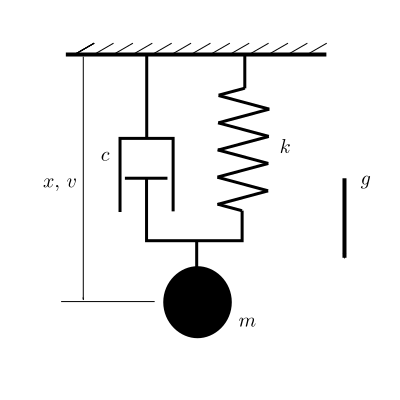

In [1]:
from IPython.display import SVG
SVG(filename='mass_spring_damper.svg')

Start by loading in the core functionality of both SymPy and Mechanics.

In [1]:
import sympy as sym
import sympy.physics.mechanics as me

We can make use of the pretty printing of our results by loading the SymPy printing extension.

In [3]:
from sympy import init_printing
init_printing()

We'll start by defining the variables will need for this problem. $x$ is the distance of the particle from the ceiling, $v$ is the speed of the particle, $m$ is the mass of the particle, $c$ is the damping coefficient of the damper, $k$ is the stiffness of the spring, $g$ is the acceleration due to gravity, and $t$ represents time.

In [4]:
x, v = me.dynamicsymbols('x v')

In [5]:
m, c, k, g, t = sym.symbols('m c k g t')

Now, we define a Newtonian reference frame that represents the ceiling which the particle is attached to, $C$.

In [6]:
ceiling = me.ReferenceFrame('C')

We will need two points, one to represent the original position of the particle which stays fixed in the ceiling frame, $o$, and the second one, $p$ which is aligned with the particle as it moves.

In [7]:
o = me.Point('o')
p = me.Point('p')

The velocity of point $o$ in the ceiling is zero.

In [8]:
o.set_vel(ceiling, 0)

Point $p$ can move downward in the $x$ direction and it's velocity is $v$ in the downward direction.

In [9]:
p.set_pos(o, x * ceiling.x)
p.set_vel(ceiling, v * ceiling.x)

There are three forces acting on the particle. Those due to the acceleration of gravity, the damper, and the spring.

In [10]:
damping = -c * p.vel(ceiling)
stiffness = -k * p.pos_from(o)
gravity = m * g * ceiling.x
forces = damping + stiffness + gravity
forces

Now we can use Newton's second law, $0=F-ma$, to form the equation of motion of the system.

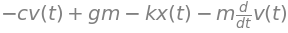

In [11]:
zero = me.dot(forces - m * p.acc(ceiling), ceiling.x)
zero

We can then form the first order equations of motion by solving for $\frac{dv}{dt}$ and introducing the kinematical differential equation, $v=\frac{dx}{dt}$.

In [12]:
dvdt = sym.solve(zero, v.diff(t))[0]
dxdt = v
dvdt, dxdt

Forming the equations of motion can also be done with the automated methods available in the Mechanics package: `LagrangesMethod` and `KanesMethod`. Here we will make use of Kane's method to find the same equations of motion which we found manually above. First define a particle which represents the mass attached to the damper and spring.

In [13]:
mass = me.Particle('mass', p, m)

Now we can construct a `KanesMethod` object by passing in the generalized coordinate, $x$, the generalized speed, $v$, and the kinematical differential equation which relates the two, $0=v-\frac{dx}{dt}$.

In [14]:
kane = me.KanesMethod(ceiling, q_ind=[x], u_ind=[v], kd_eqs=[v - x.diff(t)])

Now Kane's equations can be computed which returns $F_r$ and $F_r^*$.

In [17]:
kane.kanes_equations?

In [19]:
kane.kanes_equations([(p, forces)], [mass])

⎛                          ⎡   d       ⎤⎞
⎜[-c⋅v(t) + g⋅m - k⋅x(t)], ⎢-m⋅──(v(t))⎥⎟
⎝                          ⎣   dt      ⎦⎠

The equations are also available in the form $M\frac{dq,u}{dt}=f(\dot{u}, u, q)$ and we can extract the mass matrix, $M$, and the forcing equations, $f$.

In [20]:
M = kane.mass_matrix_full
f = kane.forcing_full
M, f

⎛⎡1  0⎤  ⎡         v(t)         ⎤⎞
⎜⎢    ⎥, ⎢                      ⎥⎟
⎝⎣0  m⎦  ⎣-c⋅v(t) + g⋅m - k⋅x(t)⎦⎠

Finally, we can form the first order differential equations of motion $\frac{dq,u}{dt}=M^{-1}f(\dot{u}, u, q)$, which is the same as previously found.

In [21]:
M.inv() * f

⎡         v(t)         ⎤
⎢                      ⎥
⎢-c⋅v(t) + g⋅m - k⋅x(t)⎥
⎢──────────────────────⎥
⎣          m           ⎦